In [2]:
import pandas as pd
from models import batch_car_calculator

In [3]:
# 把证券代码添加进来
df_raw_CAR = pd.read_excel("./data/processed/股份回购与分红合并_添加Treat_Post.xlsx", skiprows=[1], dtype={"SCode_回购":str})
df_industry = pd.read_excel("./data/raw/公司行业分类.xlsx", dtype={"股票代码":str})

print(f"原始数据行数: {len(df_raw_CAR)}")
print(f"行业分类数据行数: {len(df_industry)}")

# 检查重复
print(f"df_industry 中 股票代码 重复数: {df_industry['股票代码'].duplicated().sum()}")

# 重新开始，避免重复合并
df_CAR = df_raw_CAR.copy()

# 第二次合并：添加证券代码（去重后合并）
df_industry_unique = df_industry.drop_duplicates(subset=['股票代码'], keep='first')
print(f"去重后的行业数据: {len(df_industry_unique)} 行")

df_CAR = pd.merge(df_CAR, df_industry_unique[['证券代码','股票代码']], 
                  left_on='SCode_回购', right_on='股票代码', how='left').drop(columns=['股票代码'])
print(f"合并证券代码后: {len(df_CAR)} 行")

# 验证最终数据
if len(df_CAR) != len(df_raw_CAR):
    print(f"\n⚠️ 警告: 最终行数 ({len(df_CAR)}) 与原始行数 ({len(df_raw_CAR)}) 不一致！")
else:
    print(f"\n✓ 合并成功，行数一致: {len(df_CAR)} 行")
df_CAR.to_excel("./data/interim/CAR.xlsx", index=False)
# 检查数据
print(f"\n数据预览:")
df_CAR.head(5)

原始数据行数: 11464
行业分类数据行数: 5177
df_industry 中 股票代码 重复数: 1
去重后的行业数据: 5176 行
合并证券代码后: 11464 行

✓ 合并成功，行数一致: 11464 行

数据预览:

数据预览:


,SCode_回购,BPAmtDy,SoAmDAD,RepMaNum,RepMiNum,RepType,RepProc,MaxPrc,MinPrc,AvePrc,...,EqBenmk,EqBenmkDt,AnnDt,RecordDt,DRDt,DPRDt,BnsShrLDt,Treat,Post,证券代码
0,000002,2015-07-06,2015-09-01,12480299.0,12480299.0,普通回购,实施完成,1.000000e+10,NaN,12.83,...,1.103915e+06,2016-07-28,2016-07-22,2016-07-28,2016-07-29,2016-07-29,NaN,1,0,000002.SZ
1,000002,2022-03-31,NaN,136836344.0,109469075.0,普通回购,实施中,2.500000e+09,2.000000e+09,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,000002.SZ
2,000004,2021-05-27,NaN,9049599.0,9049599.0,普通回购,完成实施,1.000000e+00,1.000000e+00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,000004.SZ
3,000004,2022-04-30,2022-05-21,23155018.0,23155018.0,普通回购,股东大会通过,1.000000e+00,1.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,000004.SZ
4,000004,2023-04-29,2023-05-20,939474.0,939474.0,普通回购,实施中,1.000000e+00,1.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,000004.SZ


In [4]:
# 随机抽样测试 CAR 计算

df_CAR_sample = df_CAR
# 随机抽样 100 行
# sample_size = 50
# df_CAR_sample = df_CAR.sample(n=min(sample_size, len(df_CAR)), random_state=42).copy()
# print(f"抽样测试: {len(df_CAR_sample)} 行")




In [5]:
from models import BatchCARCalculator
import os

calculator = BatchCARCalculator(
    df=df_CAR_sample, 
    estimation_window=(-120, -30),
    event_window=(-5, 5)
)

# 运行计算
print("开始批量计算...")
df_result = calculator.run()

# 保存结果
output_path = "./data/processed/CAR_sample_result.xlsx"
df_result.to_excel(output_path, index=False)
print(f"计算完成，结果已保存至: {output_path}")



Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.
开始批量计算...
Step 1: 获取市场数据...
使用缓存的市场指数数据
Step 2: 获取个股数据 (Wind)...
Processing row 0/11464
Processing row 100/11464
Processing row 200/11464
Processing row 300/11464
Processing row 400/11464
Processing row 500/11464
Processing row 600/11464
Processing row 700/11464
Processing row 800/11464
Processing row 900/11464
Processing row 1000/11464
Processing row 1100/11464
Processing row 1200/11464
Processing row 1300/11464
Processing row 1400/11464
Processing row 1500/11464
Processing row 1600/11464
Processing row 1700/11464
Processing row 1800/11464
Processing row 1900/11464
Processing row 2000/11464
Processing row 1000/11464
Processing row 1100/11464
Processing row 1200/11464
Processing row 1300/11464
Processing row 1400/11464
Processing row 1500/11464
Processing r

d:\学习资料\大创\大创项目代码\models\batch_car_calculator.py:251: RuntimeWarning: divide by zero encountered in scalar divide
  t_stat = car / se_car
d:\学习资料\大创\大创项目代码\models\batch_car_calculator.py:251: RuntimeWarning: divide by zero encountered in scalar divide
  t_stat = car / se_car
d:\学习资料\大创\大创项目代码\models\batch_car_calculator.py:251: RuntimeWarning: divide by zero encountered in scalar divide
  t_stat = car / se_car
d:\学习资料\大创\大创项目代码\models\batch_car_calculator.py:251: RuntimeWarning: divide by zero encountered in scalar divide
  t_stat = car / se_car
d:\学习资料\大创\大创项目代码\models\batch_car_calculator.py:251: RuntimeWarning: divide by zero encountered in scalar divide
  t_stat = car / se_car
d:\学习资料\大创\大创项目代码\models\batch_car_calculator.py:251: RuntimeWarning: divide by zero encountered in scalar divide
  t_stat = car / se_car
d:\学习资料\大创\大创项目代码\models\batch_car_calculator.py:251: RuntimeWarning: divide by zero encountered in scalar divide
  t_stat = car / se_car
d:\学习资料\大创\大创项目代码\models\batch_car

Step 4: 整合结果...
计算完成，结果已保存至: ./data/processed/CAR_sample_result.xlsx
计算完成，结果已保存至: ./data/processed/CAR_sample_result.xlsx


array([[<Axes: title={'center': 'CAR'}>]], dtype=object)

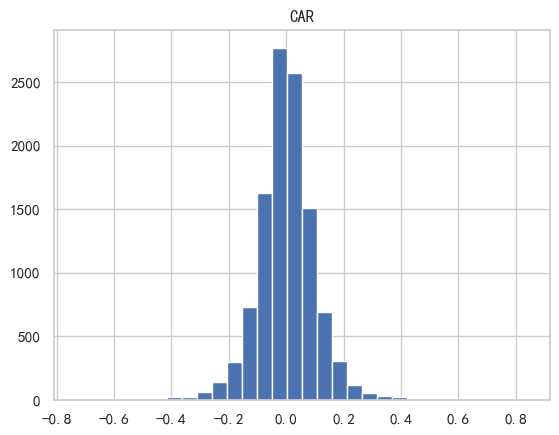

In [ ]:
df_result.head(5)
from matplotlib import pyplot as plt

df_result[['CAR']].hist(bins=30, )

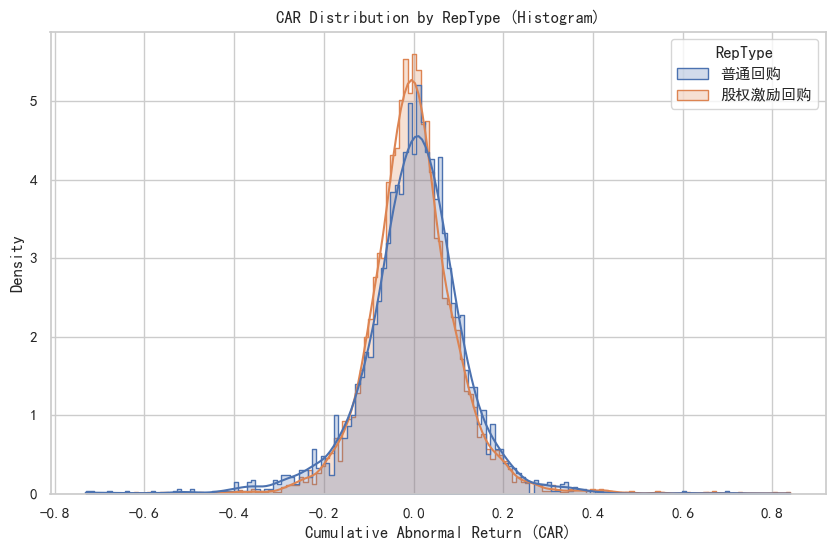

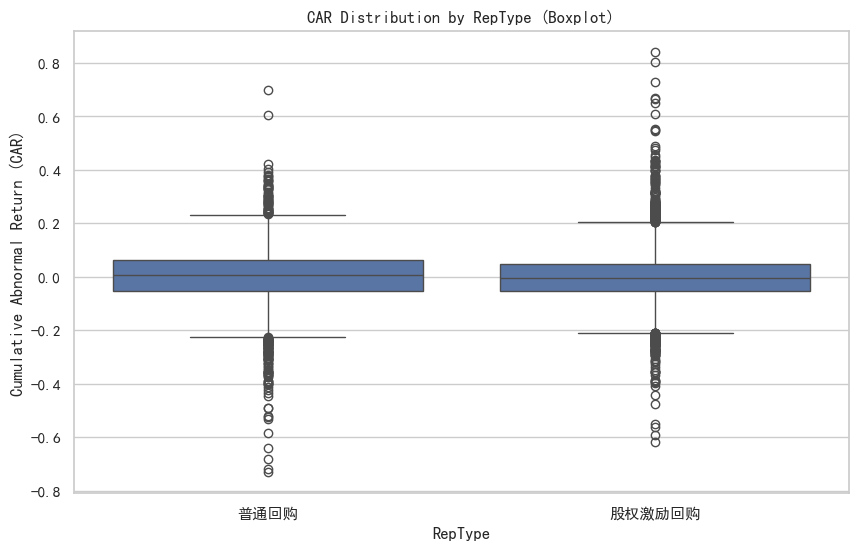

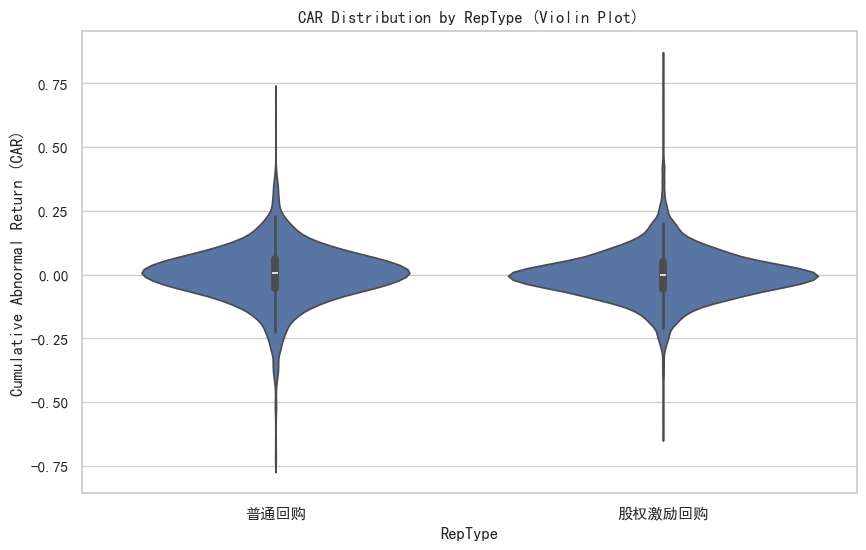

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置绘图风格
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 1. 直方图 (Histogram) - 重叠展示
plt.figure(figsize=(10, 6))
sns.histplot(data=df_result, x='CAR', hue='RepType', element="step", stat="density", common_norm=False, kde=True)
plt.title('CAR Distribution by RepType (Histogram)')
plt.xlabel('Cumulative Abnormal Return (CAR)')
plt.ylabel('Density')
plt.show()

# 2. 箱线图 (Boxplot) - 对比展示
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_result, x='RepType', y='CAR')
plt.title('CAR Distribution by RepType (Boxplot)')
plt.xlabel('RepType')
plt.ylabel('Cumulative Abnormal Return (CAR)')
plt.show()

# 3. 小提琴图 (Violin Plot) - 展示分布密度
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_result, x='RepType', y='CAR')
plt.title('CAR Distribution by RepType (Violin Plot)')
plt.xlabel('RepType')
plt.ylabel('Cumulative Abnormal Return (CAR)')
plt.show()